In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import sys
sys.path.append("../src")
from basic_info import get_basic_info
from multi_boxplot import multiboxplot
from multiplot import multiplot
from multiplot_norm import multiplot_norm
from custom_drop_na import custom_drop_na
from get_missing_formatted import get_missing_formatted
from prepare_pca_groups import prepare_pca_groups

In [6]:
df = pd.read_csv("../data/houses/raw/train.csv")

## 🧾 Basic DataFrame Overview

### 🔹 Head of the DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 📐 Shape of the DataFrame

- **Rows:** 1460  
- **Columns:** 81

### 🧩 Column Summary

,Column,Data Type,Missing Values,% Missing,Unique Values,Sample Values
0,Id,int64,0,0.000000,1460,Numerical/Continuous
1,MSSubClass,int64,0,0.000000,15,Numerical/Continuous
2,MSZoning,object,0,0.000000,5,"RL, RM, C (all), FV, RH"
3,LotFrontage,float64,259,17.740000,110,Numerical/Continuous
4,LotArea,int64,0,0.000000,1073,Numerical/Continuous
5,Street,object,0,0.000000,2,"Pave, Grvl"
6,Alley,object,1369,93.770000,2,"Grvl, Pave"
7,LotShape,object,0,0.000000,4,"Reg, IR1, IR2, IR3"
8,LandContour,object,0,0.000000,4,"Lvl, Bnk, Low, HLS"
9,Utilities,object,0,0.000000,2,"AllPub, NoSeWa"


### 📋 Duplicate Rows

- Found **0** duplicate rows

### 📊 Missing Values Heatmap

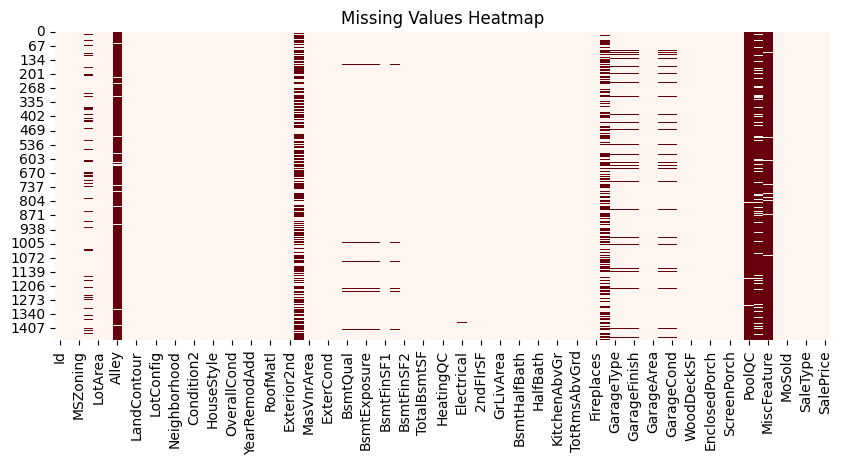

✅ **Data overview complete!**

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# That is some function that i have developt in order  
get_basic_info(df, remove_duplicates=True)

In [8]:
# Type conversion
# This are int format but there is no pressure to change it as finnaly it will be converted to float anyway 
    # YearBuilt
    # YearRemodAdd
    # YrSold
    # YrSold

In [9]:
try:
    df, cols_dropped, dropped_rows = custom_drop_na(df, drop_col = True, drop_col_threshold = 0.4,
                                                    drop_row = True, drop_row_threshold = 0.4)
except Exception as e:
    print(str(e))

In [10]:
print(cols_dropped)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
print(dropped_rows)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]


In [12]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
try:
    multiplot_norm(df, "SalePrice")
except Exception as e:
    print(str(e))

'SalePrice' has too many unique values (663). Consider grouping or categorizing it.


In [14]:
# if there was price below 0 we would need to cut is
price_labels = ["very cheap", "cheap", "normal", "expensive", "very expensive"]
price_bins = [0         , 100000,     150000,     200000,     400000,     np.inf]
df["PriceCategory"] = pd.cut(x = df["SalePrice"], bins = price_bins, labels = price_labels)
df[["SalePrice", "PriceCategory"]].head()

,SalePrice,PriceCategory
0,208500,expensive
1,181500,normal
2,223500,expensive
3,140000,cheap
4,250000,expensive


In [15]:
# We can observe that the distribution is skeawed
print(pd.concat([
    df["PriceCategory"].value_counts(),
    df["PriceCategory"].value_counts(normalize=True).mul(100).round(2)
], axis=1, keys=["Count", "Percentage"]))


                Count  Percentage
PriceCategory                    
cheap             496       33.97
normal            414       28.36
expensive         399       27.33
very cheap        123        8.42
very expensive     28        1.92


In [16]:
# If commneted uncomment
# try:
#     multiplot(df,  "PriceCategory", cols_to_exclude = ["Id"], create_kde=False)
# except Exception as e:
#     print(str(e))

In [17]:
# I know that many of these plots will look bad, but still it is better then creating each plot by hand,
# Thanks to that we can know where to focus 
# if it is commented uncomment, it takes some time to create 70 plots 
# try:
#     multiplot_norm(df, "PriceCategory",cols_to_exclude = ["Id"], create_kde=False)
# except Exception as e:
#     print(str(e))

In [18]:
# I want to see again where are the missing values
missing_summary = get_missing_formatted(df, only_missing=True)
display(missing_summary)

,Column,% Missing,Missing Values Sum
0,LotFrontage,17.74,259
1,MasVnrArea,0.55,8
2,BsmtQual,2.53,37
3,BsmtCond,2.53,37
4,BsmtExposure,2.60,38
5,BsmtFinType1,2.53,37
6,BsmtFinType2,2.60,38
7,Electrical,0.07,1
8,GarageType,5.55,81
9,GarageYrBlt,5.55,81


             LotFrontage   LotArea
LotFrontage     1.000000  0.426095
LotArea         0.426095  1.000000


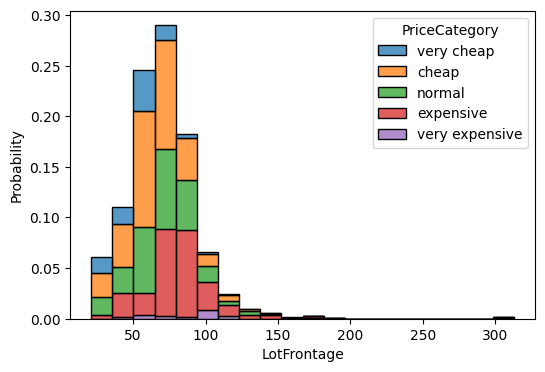

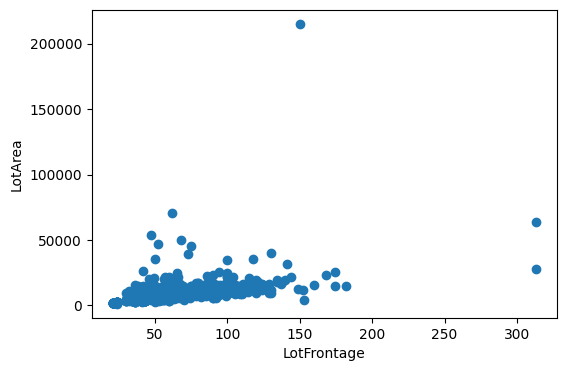

In [19]:
# fill na of LotFrontage with the gruping on the Lot Area, usin mean
print(df[["LotFrontage", "LotArea"]].corr())

plt.figure(figsize=(6,4))
sns.histplot(
    data=df, x="LotFrontage", hue="PriceCategory", bins=20, 
    stat="probability", common_norm=True,
    multiple='stack'
)
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["LotFrontage"], df["LotArea"])
plt.xlabel("LotFrontage")
plt.ylabel("LotArea")
plt.show()
# i see that it is normaly distributed

In [20]:
# therrest i will fill besed on the Price Category as there are no that much of the missing data 
# There are better methods like analysing it one by one but i dont want to
mask = df["LotFrontage"].notnull()

# of course we can use creating LotArea bins but i wanted to show diffrent ways especialy that we can see almost linear correlation
LotFrontage_data_to_predict = df.loc[mask, ["LotArea"]]

model = LinearRegression()
model.fit(LotFrontage_data_to_predict, df.loc[mask, ["LotFrontage"]])
df.loc[~mask, "LotFrontage"] = model.predict(df.loc[~mask, ["LotArea"]])

In [21]:
missing_summary = get_missing_formatted(df, only_missing=True)
display(missing_summary)

,Column,% Missing,Missing Values Sum
0,MasVnrArea,0.55,8
1,BsmtQual,2.53,37
2,BsmtCond,2.53,37
3,BsmtExposure,2.60,38
4,BsmtFinType1,2.53,37
5,BsmtFinType2,2.60,38
6,Electrical,0.07,1
7,GarageType,5.55,81
8,GarageYrBlt,5.55,81
9,GarageFinish,5.55,81


In [22]:
missing_summary = get_missing_formatted(df, fill=True)


/media/mariusz/Projects/Code/gradient/preprocessing/solutions/../src/get_missing_formatted.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[col] = df.groupby("PriceCategory")[col].transform(lambda x: x.fillna(x.mean()))
/media/mariusz/Projects/Code/gradient/preprocessing/solutions/../src/get_missing_formatted.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[col] = df.groupby("PriceCategory")[col].transform(


In [23]:
missing_summary = get_missing_formatted(df, only_missing=True)
display(missing_summary)

,Column,% Missing,Missing Values Sum


In [ ]:
# Featureengenniering
# First convert to numeric



TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
print(tmp)

NameError: name 'tmp' is not defined